In [1]:
# Import the necessary modules for data analysis
import  warnings
warnings.simplefilter('ignore')

import numpy as np
import seaborn as sns
import scipy as sp
import pandas as pd
import os
import math
import time
import matplotlib.pyplot as plt

from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, auc, roc_curve, classification_report
from sklearn.preprocessing import RobustScaler

In [2]:
# Collect file names from the working directory
fileNames = []
for _, _, files in os.walk('./air-pollution-data'):
    fileNames.extend(files)

city = []
for name in fileNames:
    city.append(pd.read_csv('./air-pollution-data/' + name))
    
# Print city's name
n = len(city)
print("Total number of cities is %s \n" %n)
for i, j in enumerate(fileNames):
    print("The city #%s is: %s \n" %(i+1, j.replace('.csv', '')))

Total number of cities is 5 

The city #1 is: Beijing 

The city #2 is: Chengdu 

The city #3 is: Guangzhou 

The city #4 is: Shanghai 

The city #5 is: Shenyang 



In [3]:
# Check for missing data points in each city
for i in range(n):
    mis_vals = city[i].isnull().sum()
    total = np.product(city[i].shape)
    mis = mis_vals.sum()
    percent_mis = 100*mis/total
    print("The percentage of missing values in %s is: %.2f" %(fileNames[i].replace('.csv', ''), percent_mis))
    print("Missing Points by column")
    #print(mis_vals[:])
    
# Delete column with the label 'No' corresponding to number
for i in range(n):
    del city[i]['No']

The percentage of missing values in Beijing is: 9.63
Missing Points by column
The percentage of missing values in Chengdu is: 9.95
Missing Points by column
The percentage of missing values in Guangzhou is: 8.05
Missing Points by column
The percentage of missing values in Shanghai is: 9.17
Missing Points by column
The percentage of missing values in Shenyang is: 13.06
Missing Points by column


In [4]:
# Print the first five columns for each data set
for i in range(n):
    display(city[i].head())

,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0


,year,month,day,hour,season,PM_Caotangsi,PM_Shahepu,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,2010,1,1,0,4,NaN,NaN,NaN,4.0,81.20,1022.0,7.0,cv,1.0,0.0,0.0
1,2010,1,1,1,4,NaN,NaN,NaN,4.0,86.99,1022.0,6.0,cv,1.0,0.0,0.0
2,2010,1,1,2,4,NaN,NaN,NaN,4.0,86.99,1021.0,6.0,cv,1.0,0.0,0.0
3,2010,1,1,3,4,NaN,NaN,NaN,3.0,86.89,1021.0,5.0,cv,1.0,0.0,0.0
4,2010,1,1,4,4,NaN,NaN,NaN,2.0,86.79,1021.0,4.0,cv,1.0,0.0,0.0


,year,month,day,hour,season,PM_City Station,PM_5th Middle School,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,2010,1,1,0,4.0,NaN,NaN,NaN,9.4,76.0,1015.1,13.5,NW,0.8,0.0,0.0
1,2010,1,1,1,4.0,NaN,NaN,NaN,10.2,83.0,1015.2,13.0,cv,0.5,0.0,0.0
2,2010,1,1,2,4.0,NaN,NaN,NaN,10.4,87.0,1015.0,12.5,NW,0.6,0.3,0.3
3,2010,1,1,3,4.0,NaN,NaN,NaN,10.2,89.0,1014.9,12.0,NW,1.4,0.6,0.9
4,2010,1,1,4,4.0,NaN,NaN,NaN,10.4,91.0,1014.6,11.8,NE,0.6,0.7,1.6


,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,2010,1,1,0,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0
1,2010,1,1,1,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0
2,2010,1,1,2,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0
3,2010,1,1,3,4,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0
4,2010,1,1,4,4,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0


,year,month,day,hour,season,PM_Taiyuanjie,PM_US Post,PM_Xiaoheyan,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,2010,1,1,0,4,NaN,NaN,NaN,-26.0,69.79,1024.0,-22.0,NE,1.0289,NaN,NaN
1,2010,1,1,1,4,NaN,NaN,NaN,-26.0,76.26,1024.0,-23.0,NE,2.5722,NaN,NaN
2,2010,1,1,2,4,NaN,NaN,NaN,-27.0,69.56,1023.0,-23.0,NE,5.1444,NaN,NaN
3,2010,1,1,3,4,NaN,NaN,NaN,-27.0,69.56,1023.0,-23.0,NE,7.7166,NaN,NaN
4,2010,1,1,4,4,NaN,NaN,NaN,-27.0,69.56,1022.0,-23.0,NE,9.7744,NaN,NaN


In [5]:
# Implement the function that handles missing values
def fillMissing(data, n, method=None):
    """
    Filling missing values in the table withe either 0, nearest value, or drop the entire row that contains NaN
    @data: input dataframes
    @n: total number of dataframes
    @method: applied method to drop values in the table - "zero", "nearest", or None
    
    @return: fixed dataframe
    """
    modData = []
    if method == "zeros":
        for i in range(n):
            modData.append(data[i].fillna(0))
    elif method == "nearest":
        for i in range(n):
            modData.append(data[i].fillna(method='bfill', axis=0).fillna(0))
    else:
        for i in range(n):
            modData.append(data[i].dropna(axis=0))
    
    return modData

In [6]:
# Calculate average PM levels in each city from available stations
meanAverage = []
stdAverage = []
frame = {}
for c in range(n):
    pmAll = []
    pmCity = []
    meanVals = []
    for name in city[c].columns:
        if "PM" in name:
            pmAll.append(city[c][name].to_numpy())
    pmCity.append(np.array(pmAll))
    meanVals.append([np.nanmean(x, axis=0) for x in pmCity])
    cityName = "pm"
    frame[c] = meanVals[0][0]
    meanAverage.append(np.nanmean(np.array(meanVals)))
    stdAverage.append(np.nanstd(np.array(meanVals)))
    
for i, key in enumerate(frame):
    city[i]['pm'] = frame[key]

# Print average values for each (all times)
for i in range(len(meanAverage)):
    print(meanAverage[i])  

95.18355527059907
79.86120035844642
51.13099411700077
54.83886573741438
78.30155817397464


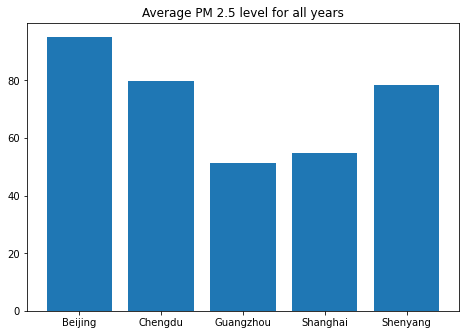

In [7]:
# Barplot of average PM levels (all times)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = [s.replace(".csv", "") for s in fileNames]
ax.bar(names,meanAverage)
plt.title("Average PM 2.5 level for all years")
plt.show()

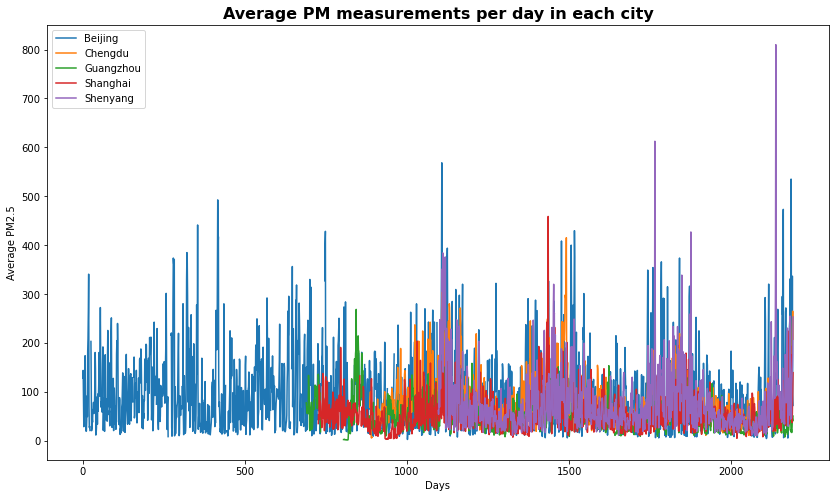

In [8]:
# Calculate and plot daily averages for each city
cityM = city

fig, ax = plt.subplots(figsize=(14,8))
ax.set_title("Average PM measurements per day in each city", fontsize = 16, fontweight='bold')
ax.set_xlabel("Days")
ax.set_ylabel("Average PM2.5")

for m in range(n):
    dayAverage = []
    arr = cityM[m]['pm'].tolist()
    dt = 24
    days = range(int(len(arr)/dt))
    for i in range(int(len(arr)/dt)):
        meanV = np.nanmean(arr[i*dt:i*dt+dt])
        dayAverage.append(meanV)

    line, = ax.plot(days, dayAverage)
    line.set_label(fileNames[m].replace('.csv', ''))
    ax.legend()
    
plt.show()

# Remove outlier from the data the data set (more > 600 units)
for i in range(n):
    df = city[i]
    df.drop(df[df['pm'] > 600].index, inplace = True)
    arr = city[i]['pm'].tolist()


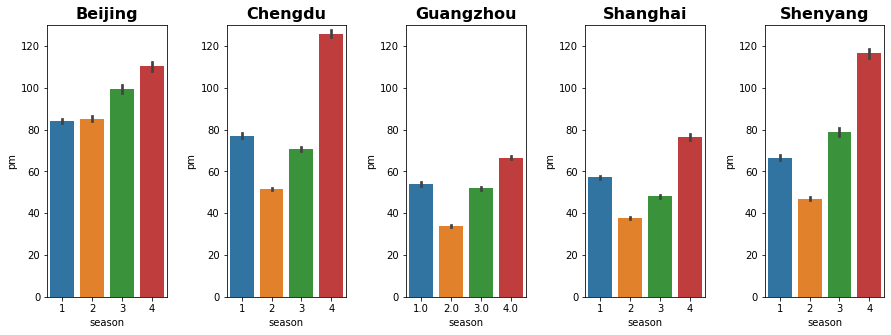

In [9]:
# Plot seasonal averages in each city
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
fig.subplots_adjust(hspace = .1, wspace=0.5)
for i in range(n):
    sns.barplot(x='season', y='pm', data=city[i], ax=ax[i]).set_title(fileNames[i].replace('.csv', ''), fontsize = 16, fontweight='bold')
    ax[i].set_ylim(0, 130);
plt.ylim(0, 130)
plt.show()

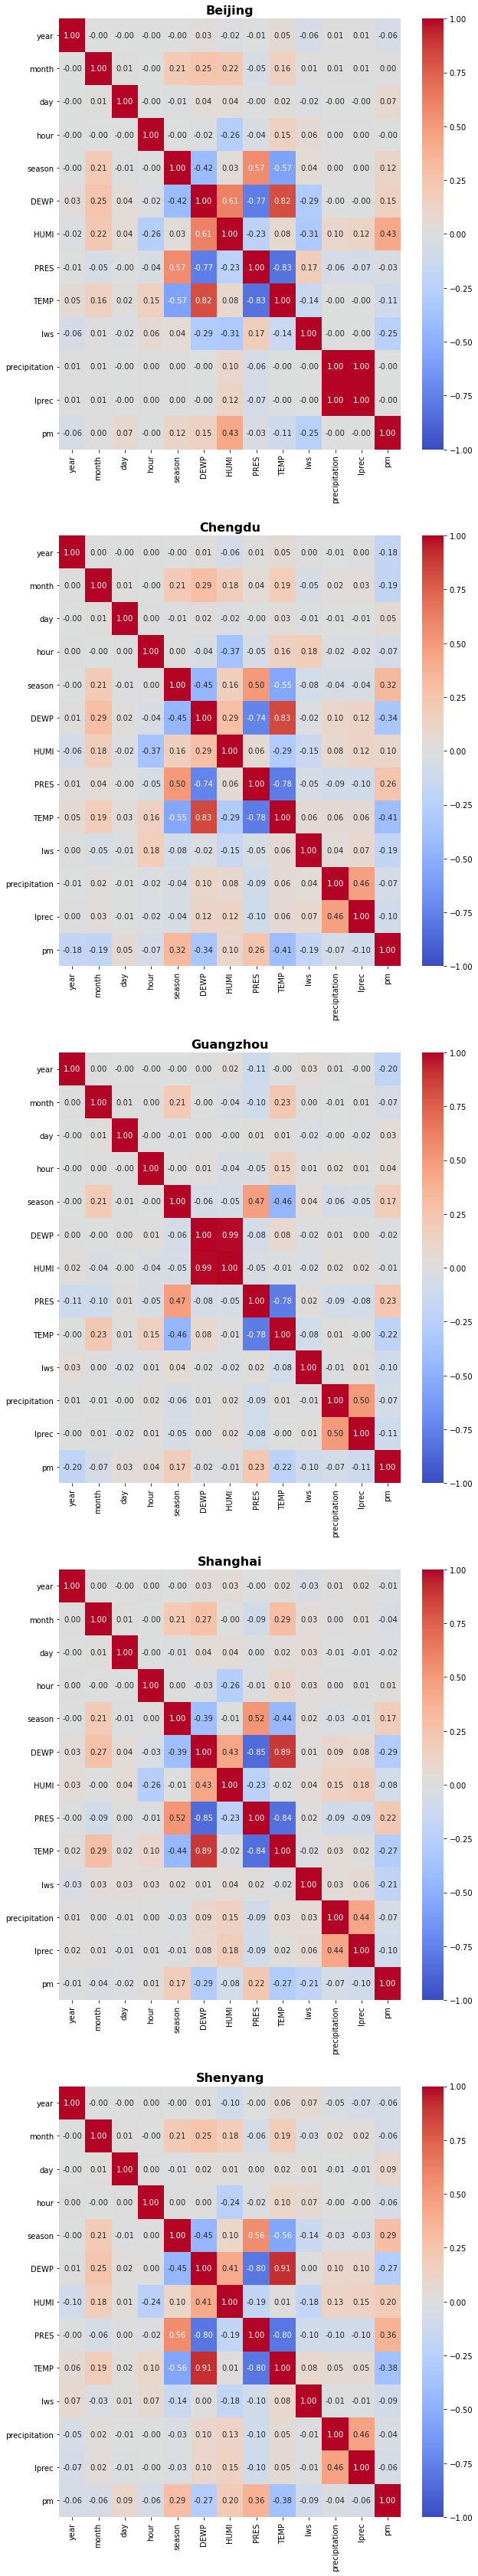

In [10]:
# Select columns with categorical data for each city
categorCols = [cname for cname in city[0].columns if city[0][cname].dtype == 'object']

# Drop categorical data from the data sets
for i in range(n):
    for name in categorCols: 
        if name in city[i].columns:
            del city[i][name]

# Drop PM measurements from each station
for i in range(n):
    for colName in city[i]:
        if "PM_" in colName: 
            del city[i][colName]
            
# Drop all rows with NaN values
cityM = fillMissing(city, n, None)

# Correlation between variables in each city
fig, axs = plt.subplots(nrows = 5, ncols = 1, figsize=(10, 60))
fig.subplots_adjust(hspace = .2, wspace=1)
for i in range(5):
    sns.heatmap(city[i].corr(), ax=axs[i], vmin=-1, vmax=1, annot=True, fmt="0.2f",cmap='coolwarm')
    axs[i].set_title(fileNames[i].replace('.csv', ''), fontsize = 16, fontweight='bold')
    plt.plot()

In [11]:
# Combine all cities in a single dataframe for machine learning modeling
cities = cityM[0]
display(cities.shape)
for i in range(1, n):
    cities = cities.append(cityM[i], ignore_index=True)
display(cities.shape)

(49826, 13)

(168863, 13)

Validation MAE for Random Forest Model: 21.824
Validation MAE for SVR: 34.124


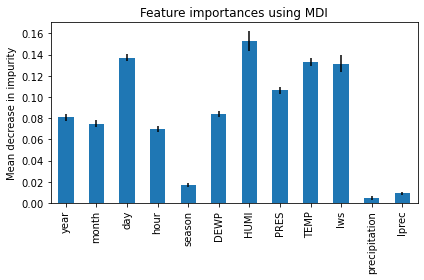

In [12]:
# Machine Learning Modeling

# Target values
y = cities['pm']

# Features for training
features = [] 
for colName in cities:
    if colName != 'pm':
        features.append(colName)
x = cities[features]

# Train/Validation Split (80%/20%)
xTrain, xVal, yTrain, yVal = train_test_split(x, y, random_state = 0)

# ML models under investigation
randForest = RandomForestRegressor(random_state=0)
svrModel = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

# Scale the input parameters to reduce the influence of outliers
scaler = RobustScaler()
xTrain = scaler.fit_transform(xTrain)
xVal = scaler.transform(xVal)

randForest.fit(xTrain, yTrain)
yPred = randForest.predict(xVal)

svrModel.fit(xTrain, yTrain)
ysvrPred = svrModel.predict(xVal)

# Feature importance extraction
start_time = time.time()
importances = randForest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in randForest.estimators_], axis=0)
elapsed_time = time.time() - start_time

forest_importances = pd.Series(importances, index=features)

# Plot the feature importance map
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Print important model parameters
print("Validation MAE for Random Forest Model: %.3f" %(mean_absolute_error(yVal, yPred)))
print("Validation MAE for SVR: %.3f" %(mean_absolute_error(yVal, ysvrPred)))

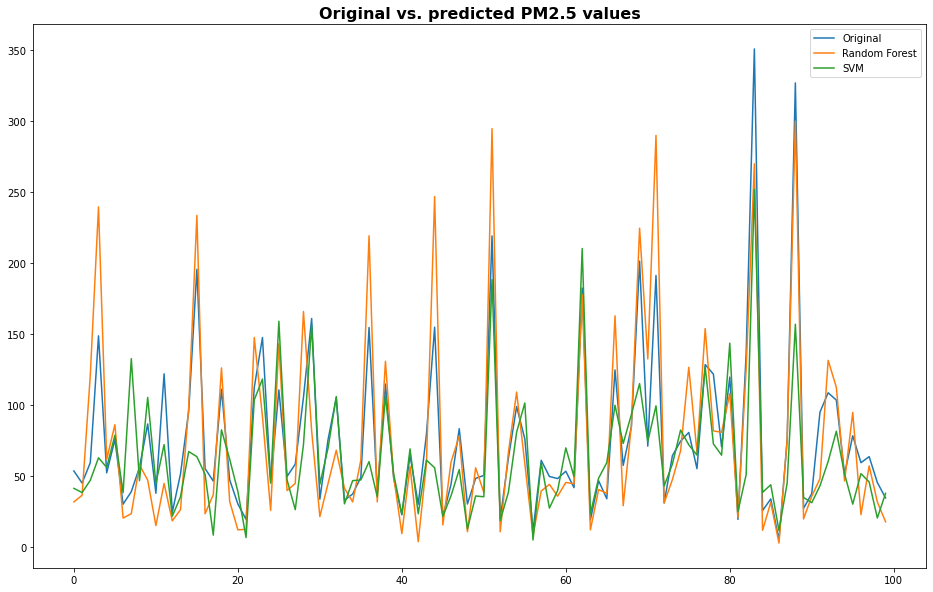

In [13]:
# Model performance comparison
x = range(100)
fig, ax = plt.subplots(figsize=(16, 10))
ax.set_title("Original vs. predicted PM2.5 values", fontsize = 16, fontweight='bold')
ax.plot(x, yPred[:100], label='Original')
ax.plot(x, yVal[:100], label='Random Forest')
ax.plot(x, ysvrPred[:100], label='SVM')
ax.legend()
plt.show()

In [14]:
# References
# 1. REVISED AIR QUALITY STANDARDS FOR PARTICLE POLLUTION AND UPDATES TO THE AIR QUALITY INDEX (AQI)
# 2. J.K. Deters et al., Machine Intelligence in Signal Sensing, Processing, and Recognition, JECE, 2017
# 3 Castelli et al, A Machine Learning Approach to Predict Air Quality in California, Complexity, 2020